In [90]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection

In [91]:
credit_df = pd.read_csv('../../../data/raw/give-me-some-credit/cs-training.csv')
del credit_df['Unnamed: 0']

X_ = credit_df[[x for x in credit_df.columns if x not in ['SeriousDlqin2yrs']]]
y_ = credit_df['SeriousDlqin2yrs']

In [92]:
X_filled = X_.fillna(0)
X_scaled = preprocessing.MinMaxScaler().fit_transform(X_filled)

X_train, X_test, _, _ = model_selection.train_test_split(X_scaled, X_scaled, test_size=0.4, random_state=1)
X_test, X_validation, _, _ = model_selection.train_test_split(X_test, X_test, test_size=0.25, random_state=1)

In [100]:
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)

(90000, 10)
(45000, 10)
(15000, 10)


In [117]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(20, activation='relu', input_shape=(X_scaled.shape[1],)))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1, activation='relu'))
model.add(keras.layers.Dense(10, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='mse')

In [118]:
history = model.fit(X_train, X_train, batch_size=128, epochs=10, validation_data=(X_test, X_test))

Train on 90000 samples, validate on 45000 samples
Epoch 1/10
90000/90000 [==============================] - 2s 24us/step - loss: 0.1434 - val_loss: 0.0897
Epoch 2/10
90000/90000 [==============================] - 2s 17us/step - loss: 0.0569 - val_loss: 0.0324
Epoch 3/10
90000/90000 [==============================] - 2s 18us/step - loss: 0.0195 - val_loss: 0.0089
Epoch 4/10
90000/90000 [==============================] - 1s 16us/step - loss: 0.0037 - val_loss: 0.0018
Epoch 5/10
90000/90000 [==============================] - 1s 16us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 6/10
90000/90000 [==============================] - 1s 16us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 7/10
90000/90000 [==============================] - 1s 16us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 8/10
90000/90000 [==============================] - 1s 16us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 9/10
90000/90000 [==============================] - 1s 16us/step - loss: 0.0015 - val_loss: 0.0015
Epoch

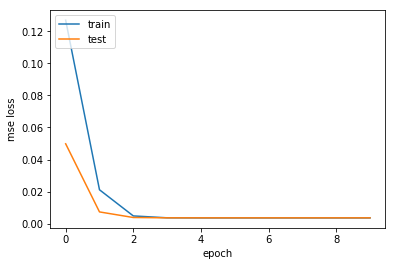

In [106]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('mse loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()